(hw1)=
# HW1

**Soft deadline:** 13.10.2024 23:59 (GMT+5). Penalty for violating soft deadline: $10\%$ per each day of delay.

**Hard deadline:** 20.10.2024 23:59 (GMT+5). No submissions after hard deadline are accepted.

## General recommendations

* Do not erase any existing cells

* Write solutions of the math problems in markdown cells of HW notebook using LaTeX. If you are not familiar with LaTeX, see a 2-page [cheat sheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for a quick start

* Provide your solution with understandable comments; do not submit tons of formulas and/or code  cells without any text description of what you are doing

* **Readability counts!** In case of poor writings you may receive penalty up to one point

## Task 1.1 (1 point)

Let $\boldsymbol A \in\mathbb R^{m\times n}$, $\boldsymbol B \in\mathbb R^{n\times m}$. Prove that $\mathrm{tr}(\boldsymbol{AB}) = \mathrm{tr}(\boldsymbol{BA})$. Using this property, calculate $\mathrm{tr}(\boldsymbol{uv}^\mathsf{T})$ if $\boldsymbol u, \boldsymbol v \in\mathbb R^n$, $\boldsymbol u \perp \boldsymbol v$.

### YOUR SOLUTION HERE

## notMNIST dataset

A utility functioin for fetching and splitting notMNIST dataset:

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from glob import glob
%config InlineBackend.figure_format = 'svg'

def load_notmnist(path='./notMNIST_small',letters='ABCDEFGHIJ',
                  img_shape=(28,28),test_size=0.25,one_hot=False):
    
    # download data if it's missing. If you have any problems, go to the urls and load it manually.
    if not os.path.exists(path):
        print("Downloading data...")
        assert os.system('curl http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz > notMNIST_small.tar.gz') == 0
        print("Extracting ...")
        assert os.system('tar -zxvf notMNIST_small.tar.gz > untar_notmnist.log') == 0
    
    data,labels = [],[]
    print("Parsing...")
    for img_path in glob(os.path.join(path,'*/*')):
        class_i = img_path.split(os.sep)[-2]
        if class_i not in letters: 
            continue
        try:
            data.append(resize(imread(img_path), img_shape))
            labels.append(class_i,)
        except:
            print("found broken img: %s [it's ok if <10 images are broken]" % img_path)
        
    data = np.stack(data)[:,None].astype('float32')
    data = (data - np.mean(data)) / np.std(data)

    #convert classes to ints
    letter_to_i = {l:i for i,l in enumerate(letters)}
    labels = np.array(list(map(letter_to_i.get, labels)))
    
    if one_hot:
        labels = (np.arange(np.max(labels) + 1)[None,:] == labels[:, None]).astype('float32')
    
    #split into train/test
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=test_size, stratify=labels)
    
    print("Done")
    return X_train, y_train, X_test, y_test

Fetch and split notMNIST dataset:

In [7]:
%%time
X_train, y_train, X_test, y_test = load_notmnist(letters='ABCDEFGHIJ')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
CPU times: user 11.9 s, sys: 3.82 s, total: 15.7 s
Wall time: 26.4 s


Size of train and test datasets:

In [8]:
X_train.shape, X_test.shape

((14043, 784), (4681, 784))

Verify that the classes are balanced:

In [9]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1404, 1405, 1405, 1405, 1404, 1404, 1404, 1404, 1404, 1404]))

Visualize some data:

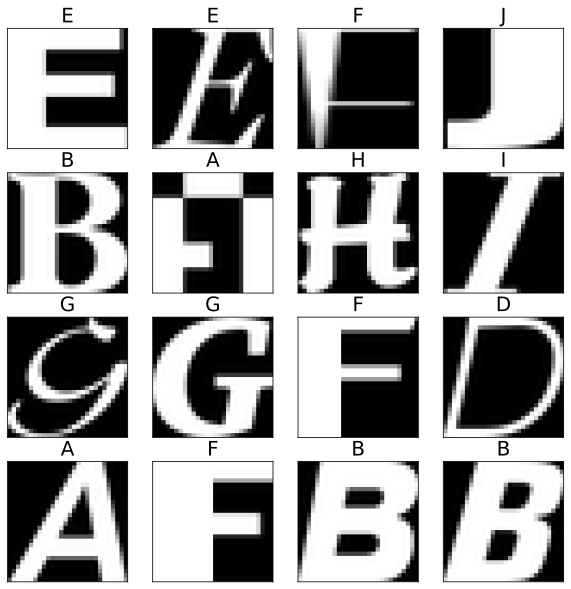

In [10]:
def plot_letters(X, y_true, y_pred=None, n=4, random_state=123):
    np.random.seed(random_state)
    indices = np.random.choice(np.arange(X.shape[0]), size=n*n, replace=False)
    plt.figure(figsize=(10, 10))
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[indices[i]].reshape(28, 28), cmap='gray')
        # plt.imshow(train_images[i], cmap=plt.cm.binary)
        if y_pred is None:
            title = chr(ord("A") + y_true[indices[i]])
        else:
            title = f"y={chr(ord('A') + y_true[indices[i]])}, ŷ={chr(ord('A') + y_pred[indices[i]])}"
        plt.title(title, size=20)
    plt.show()

plot_letters(X_train, y_train, random_state=911)

## Task 1.2 (2 points)

Apply k-NN algorithm to notMNIST dataset and measure its performance:

* train several models with different hyperparameters (take $1\leqslant k \leqslant 20$ and different distance metrics ($p=1$, $p=2$, $p=+\infty$))
* visualize several test samples and their predictions (see code below)
* show confusion matrix on train and test datasets
* plot train and test accuracies for each model on the same graph
* find the model with best test accuracy

In [ ]:
# YOUR CODE HERE

## Task 1.3 (2 points)

Apply logistic regression to notMNIST dataset.

* train several models with different value of $C$
* visualize several test samples and their predictions
* show confusion matrix on both train and test datasets
* plot train and test accuracies against $C$ for each model on the same graph
* find a model with best test accuracy

In [ ]:
# YOUR CODE HERE

## Task 1.4 (1 point)

Take two best models from previous tasks, k-NN and logistic regression, and show several digits which are

* classified correctly by both models
* classified correctly by k-NN but misclassified by logistic regression
* classified correctly by logistic regression but misclassified by k-NN
* misclassifed by both models

Find the most common class in each category.

In [ ]:
# YOUR CODE HERE

## Task 1.5 (2 points)

Fetch California Housing dataset:

In [1]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


* Split California Housing dataset into train and test
* Train linear regression, Ridge regression, LASSO and Elastic Net.
* For each model calculate MSE and $R^2$-score on both train and test dataset, and visualize them using bar plots
* Print out coefficients of each model and note if some of them are equal to $0$
* Find the model with best test metric 

In [ ]:
# YOUR CODE HERE